In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette('deep')
import pickle

In [14]:
with open('C_p001','rb') as f:
    C_p001 = pickle.load(f)
with open('C_p002','rb') as f:
    C_p002 = pickle.load(f)
with open('C_p004','rb') as f:
    C_p004 = pickle.load(f)
with open('C_p006','rb') as f:
    C_p006 = pickle.load(f)
with open('C_p010','rb') as f:
    C_p010 = pickle.load(f)

In [15]:
for r in C_p001.keys():
    C_p001[r] = np.mean(C_p001[r])
    C_p002[r] = np.mean(C_p002[r])
    C_p004[r] = np.mean(C_p004[r])
    C_p006[r] = np.mean(C_p006[r])
    C_p010[r] = np.mean(C_p010[r])

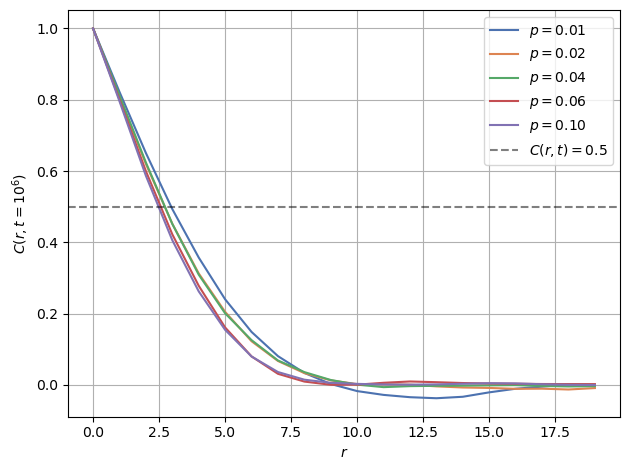

In [43]:
plt.plot(C_p001.keys(),C_p001.values(),label='$p=0.01$')
plt.plot(C_p002.keys(),C_p002.values(),label='$p=0.02$')
plt.plot(C_p004.keys(),C_p004.values(),label='$p=0.04$')
plt.plot(C_p006.keys(),C_p006.values(),label='$p=0.06$')
plt.plot(C_p010.keys(),C_p010.values(),label='$p=0.10$')

plt.axhline(0.5,color='k',linestyle='--',alpha=0.5,label='$C(r,t) = 0.5$')

plt.xlabel('$r$')
plt.ylabel('$C(r,t = 10^6)$')

plt.grid()

plt.legend()
plt.tight_layout()
plt.savefig('C(r)_p.jpg',dpi=300)

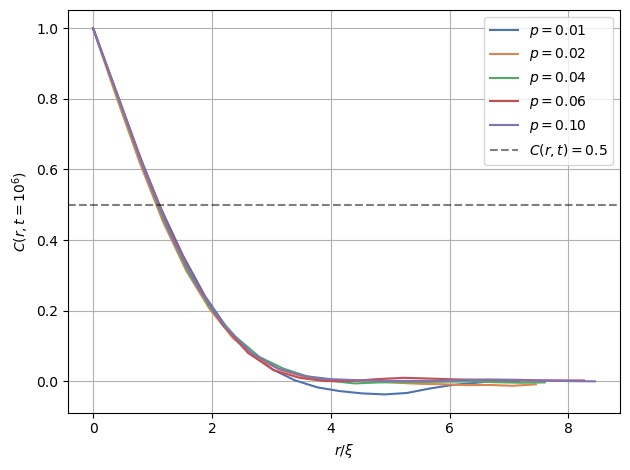

In [59]:
plt.plot(np.array(list(C_p001.keys()))/2.65,C_p001.values(),label='$p=0.01$')
plt.plot(np.array(list(C_p002.keys()))/2.55,C_p002.values(),label='$p=0.02$')
plt.plot(np.array(list(C_p004.keys()))/2.43,C_p004.values(),label='$p=0.04$')
plt.plot(np.array(list(C_p006.keys()))/2.3,C_p006.values(),label='$p=0.06$')
plt.plot(np.array(list(C_p010.keys()))/2.25,C_p010.values(),label='$p=0.10$')

plt.axhline(0.5,color='k',linestyle='--',alpha=0.5,label='$C(r,t) = 0.5$')

plt.xlabel('$r/\\xi$')
plt.ylabel('$C(r,t = 10^6)$')

plt.grid()

plt.legend()
plt.tight_layout()
plt.savefig('C(r)_collapsed_p.jpg',dpi=300)

In [31]:
xi_p = [2.65,2.55,2.43,2.3,2.22]
p = [0.01,0.02,0.04,0.06,0.10]

In [66]:
from scipy.optimize import curve_fit

def f(X,a,b):
    return a*X**(-b)
popt,pcov = curve_fit(f,p,xi_p,maxfev=10000)
print(popt,np.diag(pcov))

[1.8632284  0.07820102] [1.88679196e-03 4.26451128e-05]


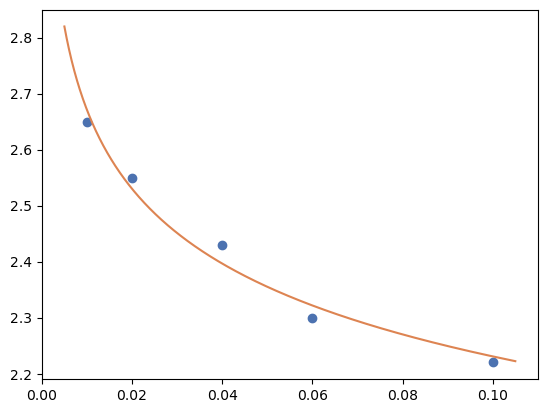

In [67]:
X = np.linspace(0.005,0.105,1000)
plt.plot(p,xi_p,'o')
plt.plot(X,f(X,*popt))